In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
N=50

A = 2
B = 2
C = 3
D = 2

t_step_total = 10

dt = 0.01

In [49]:

T = np.zeros((N, N, N)) 

for x in range(N) :
    for y in range(N) :
        for z in range(N) :
            if (x+y-z)%N == 0  : T[x][y][z]=1
            else : T[x][y][z]=0
                
#T

A = 0.2292
B = 0.2
C = 0.3
D = 0.2

W = np.zeros((N, N)) 

for x in range(N) :
    for y in range(N) :
        if x<=y : W[x][y]=  A * math.pow(math.e,(x-y)*B)
        else : W[x][y]=  -C * math.pow(math.e, (x-y) * -D)
                
W = W/N


MI = np.zeros((N, N, N)) 

for x in range(N) :
    for y in range(N) :
        for z in range(N) :
            if y==x and z==x  : MI[x][y][z]=1
            else : MI[x][y][z]=0
                
                

In [50]:
W

array([[ 4.58400000e-03,  3.75306177e-03,  3.07274709e-03, ...,
         3.79207117e-07,  3.10468528e-07,  2.54190132e-07],
       [-4.91238452e-03,  4.58400000e-03,  3.75306177e-03, ...,
         4.63164618e-07,  3.79207117e-07,  3.10468528e-07],
       [-4.02192028e-03, -4.91238452e-03,  4.58400000e-03, ...,
         5.65710542e-07,  4.63164618e-07,  3.79207117e-07],
       ...,
       [-4.96344393e-07, -6.06236411e-07, -7.40458825e-07, ...,
         4.58400000e-03,  3.75306177e-03,  3.07274709e-03],
       [-4.06372419e-07, -4.96344393e-07, -6.06236411e-07, ...,
        -4.91238452e-03,  4.58400000e-03,  3.75306177e-03],
       [-3.32709597e-07, -4.06372419e-07, -4.96344393e-07, ...,
        -4.02192028e-03, -4.91238452e-03,  4.58400000e-03]])

In [51]:
S_AB = np.random.rand(N)
PI_A = np.array(range(N))
#PI_B = np.array(range(N))
#PI_B = np.array(range(N-1,-1,-1))
PI_B = np.zeros(N)
for x in range(N) :
    PI_B[x] = (N +30 -x)%N

In [52]:
PI_B

array([30., 29., 28., 27., 26., 25., 24., 23., 22., 21., 20., 19., 18.,
       17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,
        4.,  3.,  2.,  1.,  0., 49., 48., 47., 46., 45., 44., 43., 42.,
       41., 40., 39., 38., 37., 36., 35., 34., 33., 32., 31.])

In [53]:
sum(np.dot(W, PI_B))

0.000987141371344702

In [54]:
np.dot(W, PI_B)

array([ 0.6469685 ,  0.47487027,  0.3345227 ,  0.22022045,  0.12730346,
        0.05196994, -0.00887622, -0.05774968, -0.09668461, -0.12731633,
       -0.15094689, -0.16859737, -0.18104885, -0.18887377, -0.19245886,
       -0.19202073, -0.18761447, -0.17913598, -0.16631767, -0.14871781,
       -0.12570276, -0.09642155, -0.05977173, -0.01435512,  0.04157831,
        0.11020066,  0.19419327,  0.29685435,  0.42223137,  0.57528341,
        0.76208031,  0.99004617,  0.74269261,  0.53921977,  0.37138885,
        0.23239152,  0.1165766 ,  0.01922335, -0.06364808, -0.13543631,
       -0.19909516, -0.25725218, -0.31231414, -0.36656356, -0.42225036,
       -0.48168217, -0.5473169 , -0.62186139, -0.70838009, -0.81041801])

In [55]:
np.dot( np.dot(PI_A,T)* S_AB , np.dot(W, PI_B) )

array([-84.98479523, -65.37741695, -52.84613832, -39.33177124,
       -28.94472467, -23.23950189, -20.48849526, -20.24369506,
       -21.17408348, -24.53409162, -29.75243923, -33.48605705,
       -34.57386528, -38.50064597, -41.48192143, -45.14712093,
       -52.74604007, -59.26890606, -61.56208776, -61.8795627 ,
       -63.52526781, -65.59528013, -67.31204554, -69.56454102,
       -69.43206429, -67.17955657, -65.2214377 , -63.01409009,
       -52.80751831, -36.80578397, -33.71531155,   4.15857104,
        42.19110207,  60.90839833,  74.06697088,  80.57050535,
        81.37507378,  83.87440329,  84.93330207,  85.31003047,
        82.1767304 ,  78.00043026,  65.76635755,  63.11388757,
        47.15104476,  35.00677663,  14.61508719,  -8.96034327,
       -33.36717904, -65.821463  ])

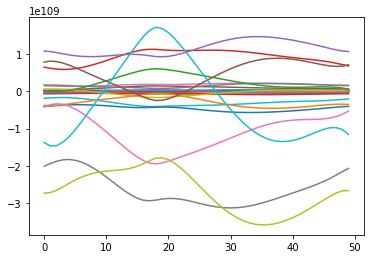

In [62]:
t_step_total = 500

for t_step_num in range(t_step_total) :
    S_AB =  S_AB*0.9 + dt * np.dot( np.dot(PI_A,T)* S_AB , np.dot(W, PI_B) )
    
    PI_B_pred = np.dot(np.dot(S_AB,T), PI_A)
    plt.plot(PI_B_pred)
    #plt.plot(S_AB)

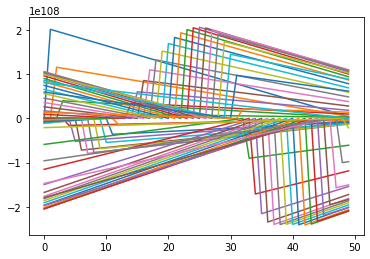

In [63]:
plt.plot(np.dot(PI_A,T)* S_AB)

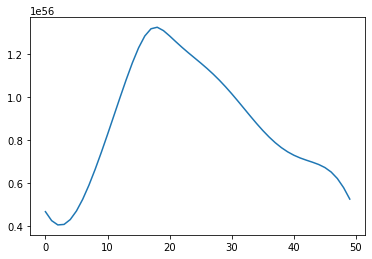

In [58]:
plt.plot(PI_B_pred)

In [59]:
np.array([1,2,3]) * np.array([5,6,7])

array([ 5, 12, 21])

In [60]:
PI_B

array([30., 29., 28., 27., 26., 25., 24., 23., 22., 21., 20., 19., 18.,
       17., 16., 15., 14., 13., 12., 11., 10.,  9.,  8.,  7.,  6.,  5.,
        4.,  3.,  2.,  1.,  0., 49., 48., 47., 46., 45., 44., 43., 42.,
       41., 40., 39., 38., 37., 36., 35., 34., 33., 32., 31.])

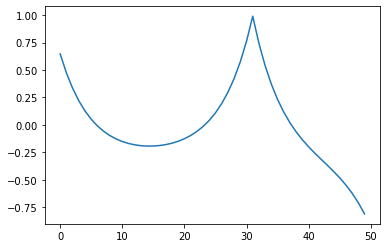

In [61]:
plt.plot(np.dot(W, PI_B))

In [45]:
sum(S_AB)

-3.686380984602343e+53

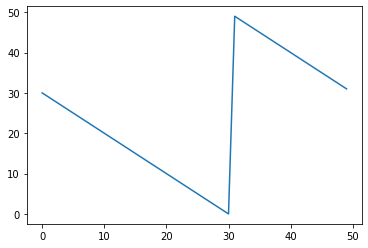

In [46]:
plt.plot(PI_B)